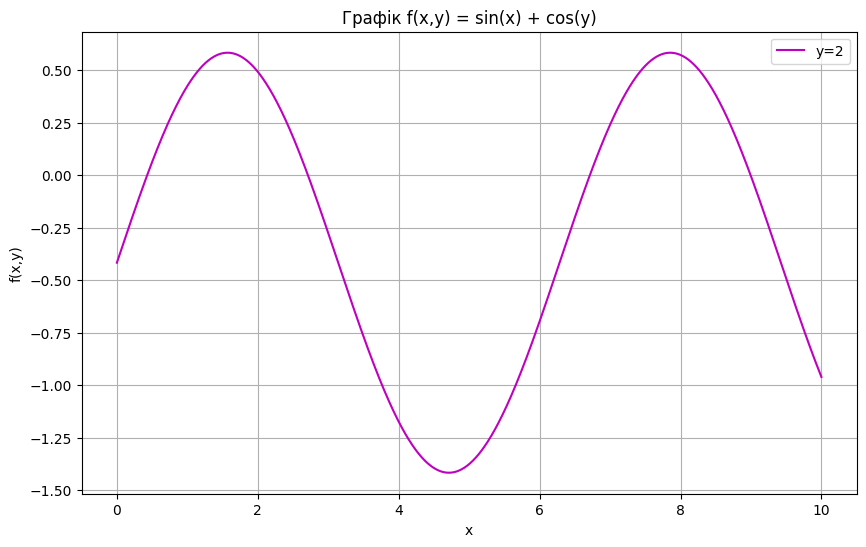

In [141]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
y = 2

f = np.sin(x) + np.cos(y)

plt.figure(figsize=(10,6))
plt.plot(x, f, 'm', label=f"y={y}")
plt.xlabel("x")
plt.ylabel("f(x,y)")
plt.title("Графік f(x,y) = sin(x) + cos(y)")
plt.grid(True)
plt.legend()
plt.show()


In [153]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

def generate_data(n_samples=2000):
    X = np.random.uniform(-5, 5, (n_samples, 2))
    Y = np.sin(X[:, 0]) + np.cos(X[:, 1])
    return X, Y

X, Y = generate_data(2000)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def mean_relative_error(y_true, y_pred, eps=1e-6):
    mask = np.abs(y_true) > eps
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))

def train_and_evaluate(model, x_train, y_train, x_test, y_test, label):
    model.fit(x_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(x_test)

    mre = mean_relative_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{label} → MRE: {mre:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")


In [154]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Concatenate, SimpleRNN

models_list = []

# --- FeedForward 1x10 ---
models_list.append((
    "FeedForward 1x10",
    Sequential([
        Input(shape=(2,)),
        Dense(10, activation="tanh"),
        Dense(1)
    ])
))

# --- FeedForward 1x20 ---
models_list.append((
    "FeedForward 1x20",
    Sequential([
        Input(shape=(2,)),
        Dense(20, activation="tanh"),
        Dense(1)
    ])
))

# --- Cascade 1x20 ---
inp = Input(shape=(2,))
h = Dense(20, activation="tanh")(inp)
concat = Concatenate()([inp, h])
out = Dense(1)(concat)
models_list.append(("Cascade 1x20", Model(inputs=inp, outputs=out)))

# --- Cascade 2x10 ---
inp = Input(shape=(2,))
h1 = Dense(10, activation="tanh")(inp)
c1 = Concatenate()([inp, h1])
h2 = Dense(10, activation="tanh")(c1)
c2 = Concatenate()([inp, h1, h2])
out = Dense(1)(c2)
models_list.append(("Cascade 2x10", Model(inputs=inp, outputs=out)))

# --- Elman 1x15 ---
models_list.append((
    "Elman 1x15",
    Sequential([
        SimpleRNN(15, activation="tanh", input_shape=(1, 2)),
        Dense(1)
    ])
))

# --- Elman 3x5 ---
models_list.append((
    "Elman 3x5",
    Sequential([
        SimpleRNN(5, activation="tanh", return_sequences=True, input_shape=(1, 2)),
        SimpleRNN(5, activation="tanh", return_sequences=True),
        SimpleRNN(5, activation="tanh"),
        Dense(1)
    ])
))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [155]:
for name, model in models_list:
    model.compile(optimizer="adam", loss="mse")

    if "Elman" in name:
        x_train_rnn = np.expand_dims(x_train, axis=1)
        x_test_rnn = np.expand_dims(x_test, axis=1)
        train_and_evaluate(model, x_train_rnn, y_train, x_test_rnn, y_test, name)
    else:
        train_and_evaluate(model, x_train, y_train, x_test, y_test, name)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
FeedForward 1x10 → MRE: 7.3103 | MAE: 0.2180 | R²: 0.9184
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
FeedForward 1x20 → MRE: 7.6219 | MAE: 0.1863 | R²: 0.9396
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Cascade 1x20 → MRE: 7.7241 | MAE: 0.1716 | R²: 0.9476
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Cascade 2x10 → MRE: 7.9617 | MAE: 0.0816 | R²: 0.9888
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Elman 1x15 → MRE: 7.5284 | MAE: 0.2056 | R²: 0.9244
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Elman 3x5 → MRE: 7.8567 | MAE: 0.2093 | R²: 0.9195


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


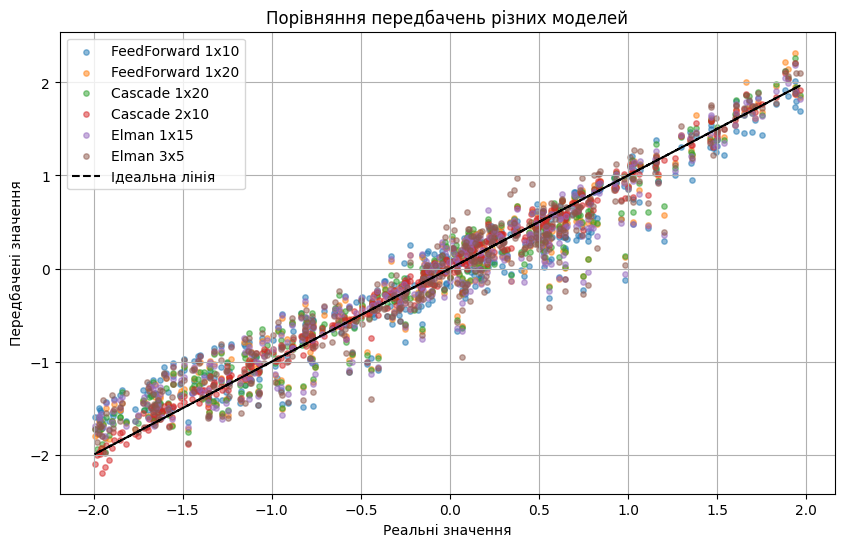

In [156]:

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10, 6))

for name, model in models_list:
    if "Elman" in name:
        x_input = np.expand_dims(x_test, axis=1)
    else:
        x_input = x_test

    y_pred = model.predict(x_input)
    plt.scatter(y_test, y_pred, label=name, alpha=0.5, s=15)

plt.plot(y_test, y_test, 'k--', label="Ідеальна лінія")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.title("Порівняння передбачень різних моделей")
plt.legend()
plt.grid(True)
plt.show()


In [160]:
print('\n'.join(dict(models_list).keys()))

FeedForward 1x10
FeedForward 1x20
Cascade 1x20
Cascade 2x10
Elman 1x15
Elman 3x5


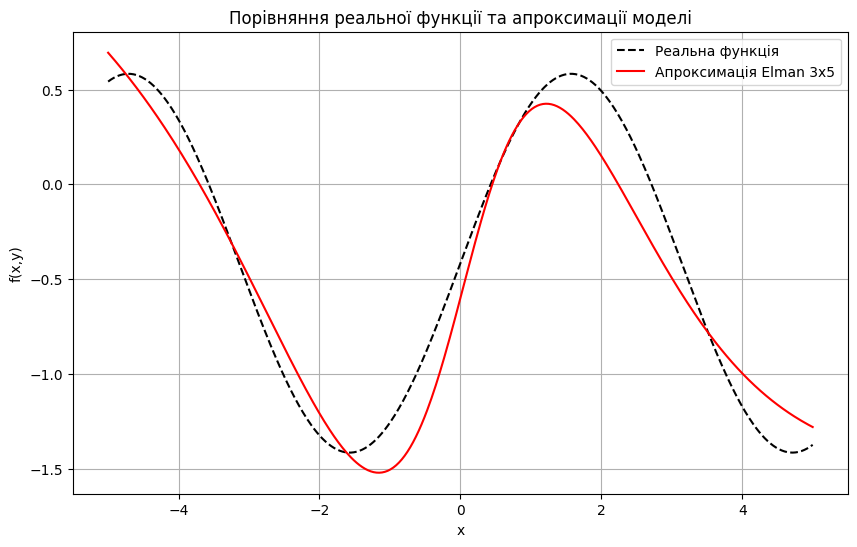

In [159]:
import numpy as np
import matplotlib.pyplot as plt

y_fixed = 2
x_vals = np.linspace(-5, 5, 500)
X_grid = np.column_stack((x_vals, np.full_like(x_vals, y_fixed)))

model_name = "Elman 3x5"
_model = dict(models_list)[model_name]

if "Elman" in model_name:
    X_input = X_grid.reshape((X_grid.shape[0], 1, X_grid.shape[1]))
else:
    X_input = X_grid

# Передбачення
y_pred = _model.predict(X_input, verbose=0)

# Реальна функція
y_true = np.sin(x_vals) + np.cos(y_fixed)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_true, label="Реальна функція", color="black", linestyle="--")
plt.plot(x_vals, y_pred, label=f"Апроксимація {model_name}", color="red")
plt.title("Порівняння реальної функції та апроксимації моделі")
plt.xlabel("x")
plt.ylabel("f(x,y)")
plt.legend()
plt.grid(True)
plt.show()
